# LLM usage in PubMed abstracts via excess vocabulary usage

In [1]:
%matplotlib notebook

import numpy as np
import pylab as plt
import pandas as pd
import pickle

plt.style.use('mpl_style.txt')

In [2]:
df = pd.read_csv("../results/yearly-counts.csv.gz")

words = df.word.values[:-1].astype(str)
years = df.columns[1:].astype(int)
counts = df.values[:-1, 1:].astype(int)
totals = df.values[-1, 1:].astype(int)

freqs = (counts.astype(float) + 1) / (totals + 1)

print('The shape of the yearly count matrix:', counts.shape)

df

The shape of the yearly count matrix: (362441, 15)


,word,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,00,4510,4985,5868,6642,7269,8082,8618,9011,10132,11169,13517,16426,18291,17827,20723
1,000,10762,11654,13283,14305,15469,15521,15612,16030,17127,18127,21622,24192,24564,23277,25514
2,0000,75,86,82,86,91,98,113,106,110,127,160,174,191,196,221
3,00000,3,6,6,3,6,5,8,10,3,5,12,4,7,5,10
4,000000,2,3,4,1,2,1,0,0,1,2,5,6,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362437,ﬂuid,0,2,4,0,4,5,4,3,2,4,6,1,6,2,2
362438,ﬂuorescence,1,3,2,3,5,7,3,6,10,9,11,12,3,9,4
362439,ﬂuorescent,1,0,1,1,1,3,0,1,1,4,6,5,2,0,3
362440,𝜒2,0,0,0,0,0,0,2,0,0,1,1,1,5,2,4


In [3]:
alphabet = 'abcdefghijklmnopqrstuvwxyz'
assert(len(alphabet) == 26)

allowedWords =  np.array([np.all([s in alphabet for s in w]) for w in words])
allowedWords &= np.array([len(w) >= 4 for w in words])

print('The number of 4+ letter words:', np.sum(allowedWords))

The number of 4+ letter words: 273111


<IPython.core.display.Javascript object>


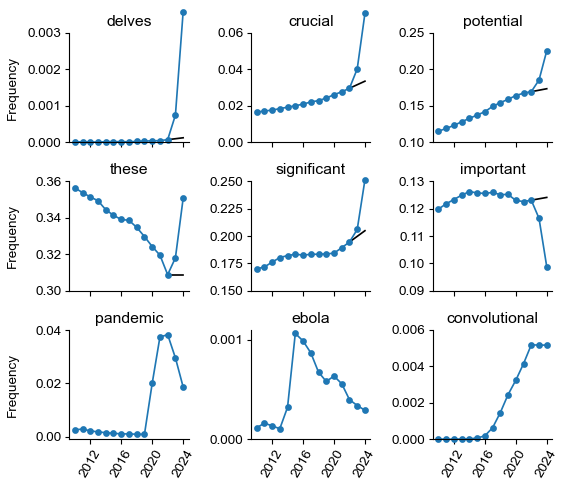

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(3.5, 3), layout='constrained')

for num, word in enumerate([
    'delves', 'crucial', 'potential', 'these', 'significant', 
    'important', 'pandemic', 'ebola', 'convolutional'
]):
    freq = freqs[words == word].ravel()
    axs.flat[num].plot(years, freq, '.-', clip_on=False)
    axs.flat[num].set_title(word)
    if num < 6:
        axs.flat[num].set_xticks([2012, 2016, 2020, 2024])
        axs.flat[num].set_xticklabels([])
    else:
        axs.flat[num].set_xticks([2012, 2016, 2020, 2024])
        axs.flat[num].set_xticklabels([2012, 2016, 2020, 2024], rotation=60)
    if num in [0, 3, 6]:
        axs.flat[num].set_ylabel('Frequency')
    if num < 6:
        proj = freq[-3] + np.maximum(0, (freq[-3] - freq[-4])) * 2
        axs.flat[num].plot([2022, 2024], [freq[-3], proj], 'k-', zorder=0)
        
    axs.flat[num].spines[['right', 'top']].set_visible(False)
    
fig.align_ylabels()

axs.flat[0].set_ylim([0, 0.003])
axs.flat[1].set_ylim([0, 0.06])
axs.flat[2].set_ylim([0.1, 0.25])
axs.flat[3].set_ylim([0.30, 0.36])
axs.flat[4].set_ylim([0.15, 0.25])
axs.flat[5].set_ylim([0.09, 0.13])
axs.flat[5].set_ylim([0.09, 0.13])
axs.flat[5].set_yticks([.09, .10, .11, .12, .13])
axs.flat[7].set_ylim([0, 0.0011])
axs.flat[7].set_yticks([0, 0.001])
axs.flat[8].set_ylim([0, 0.006])

plt.savefig('../figures/examples.png', dpi=300)
plt.savefig('../figures/examples.pdf')

## Excess words in each year

In [5]:
def compute_excess(targetYear, cutoff=1e-4):
    subsetWords = allowedWords & (
        freqs[:, years == targetYear].ravel() >= cutoff
    ) & (
        freqs[:, years == targetYear - 1].ravel() >= cutoff
    )

    projection = freqs[subsetWords, years == targetYear - 2] + np.maximum(
        (
            freqs[subsetWords, years == targetYear - 2] - 
            freqs[subsetWords, years == targetYear - 3]
        ) * 2,
        0
    )
    
    ratios = freqs[subsetWords, years == targetYear] / projection
    diffs  = freqs[subsetWords, years == targetYear] - projection
    current_freqs = freqs[subsetWords][:, years == targetYear].ravel()
    
    return subsetWords, ratios, diffs, current_freqs

In [6]:
annotations = pd.read_csv('../results/excess_words.csv')

word2type = dict(zip(annotations.word, annotations.type))

Analyzed words: 26121, increased frequency: 9991


<IPython.core.display.Javascript object>


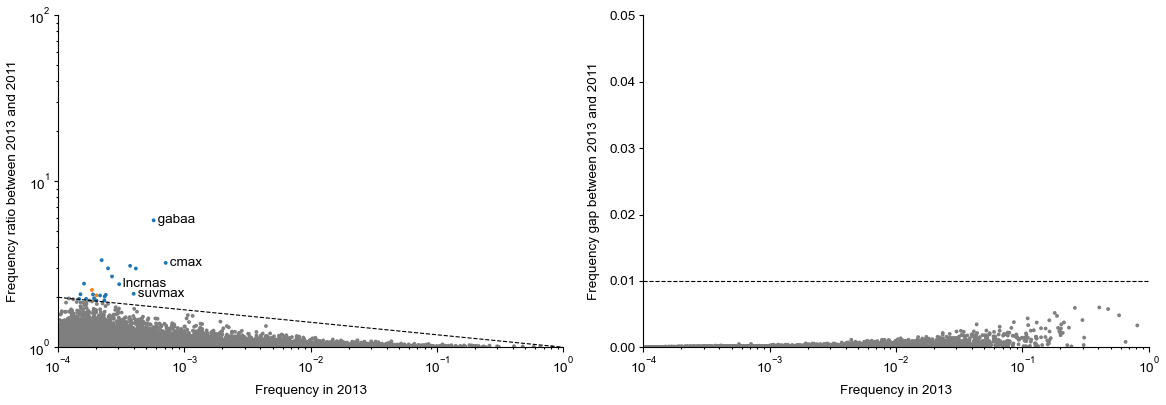

Analyzed words: 26270, increased frequency: 10001


<IPython.core.display.Javascript object>


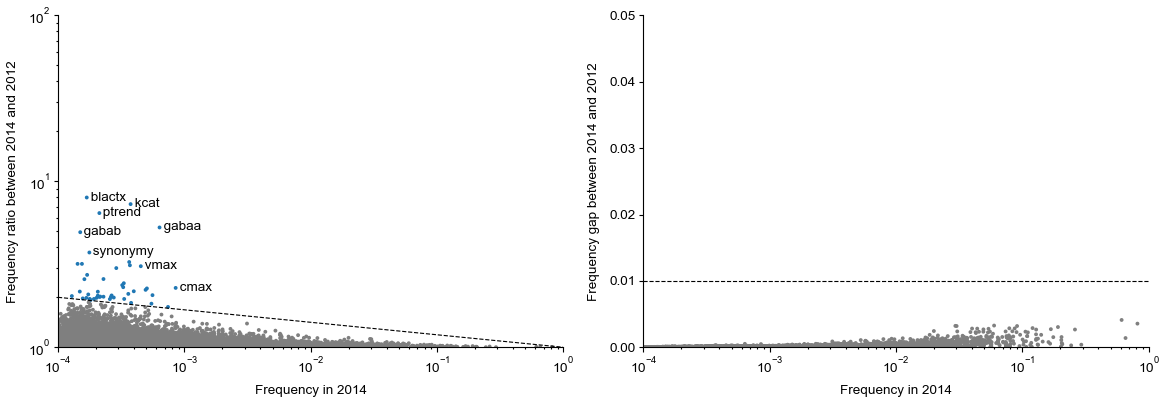

Analyzed words: 26292, increased frequency: 8816


<IPython.core.display.Javascript object>


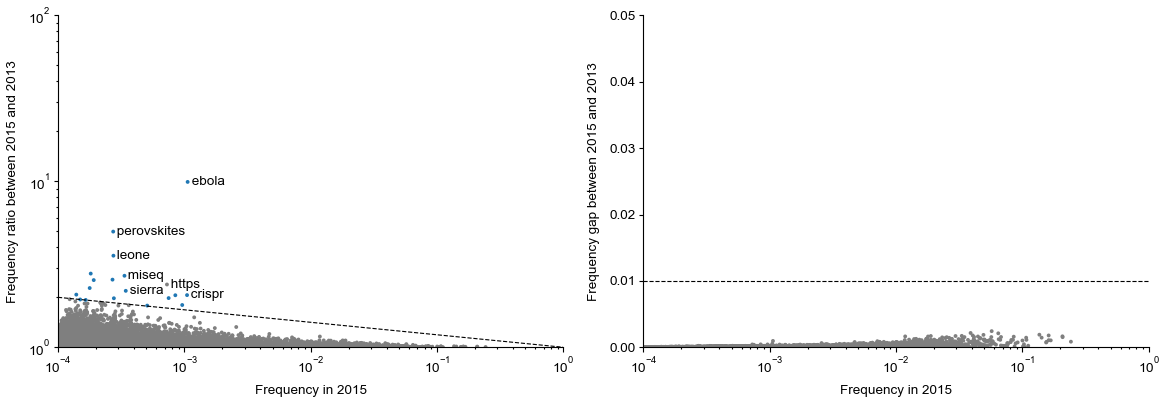

Analyzed words: 26363, increased frequency: 9461


<IPython.core.display.Javascript object>


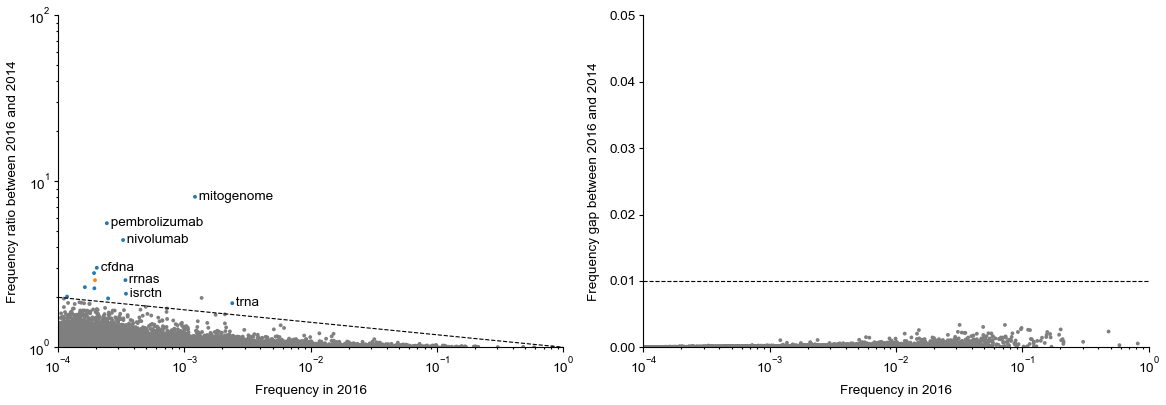

Analyzed words: 26537, increased frequency: 10559


<IPython.core.display.Javascript object>


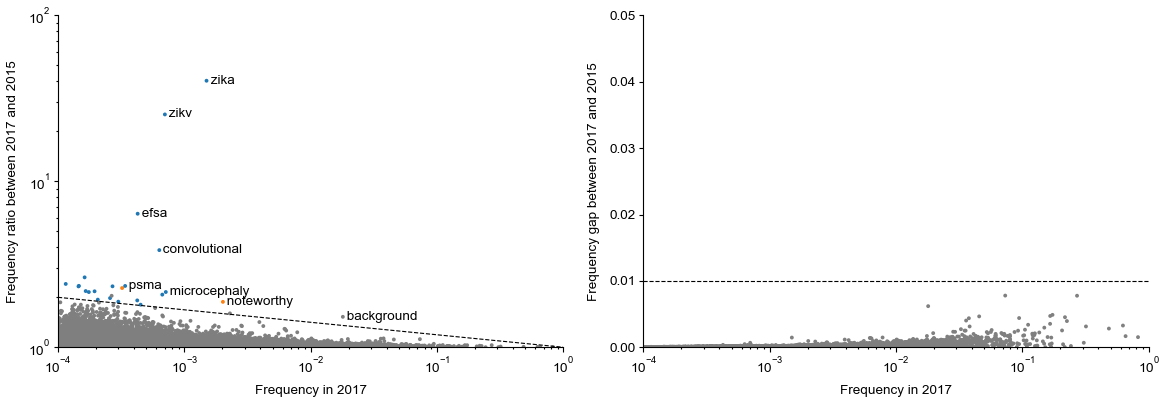

Analyzed words: 26569, increased frequency: 10077


<IPython.core.display.Javascript object>


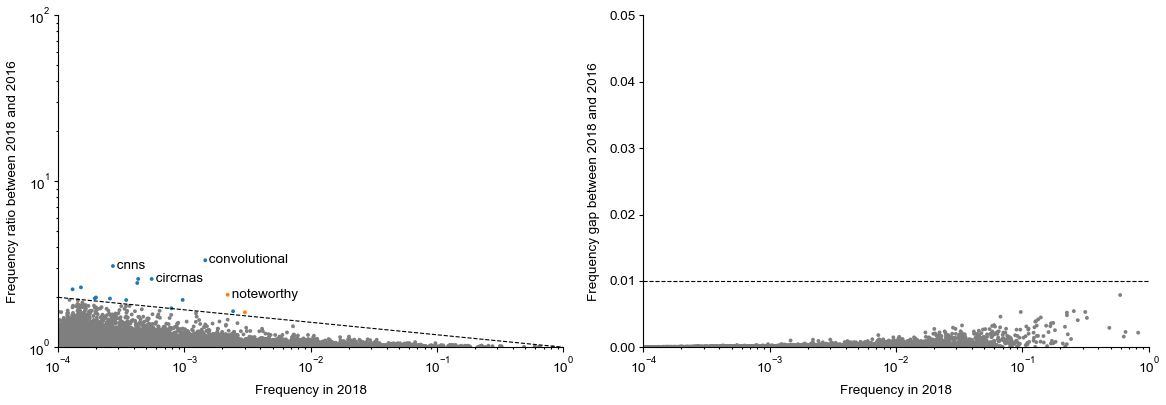

Analyzed words: 26653, increased frequency: 9429


<IPython.core.display.Javascript object>


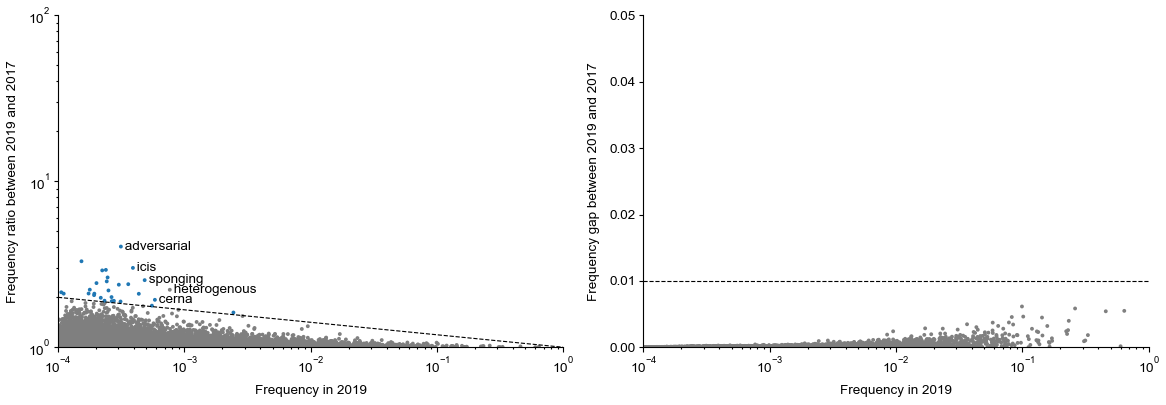

Analyzed words: 26656, increased frequency: 8780


<IPython.core.display.Javascript object>


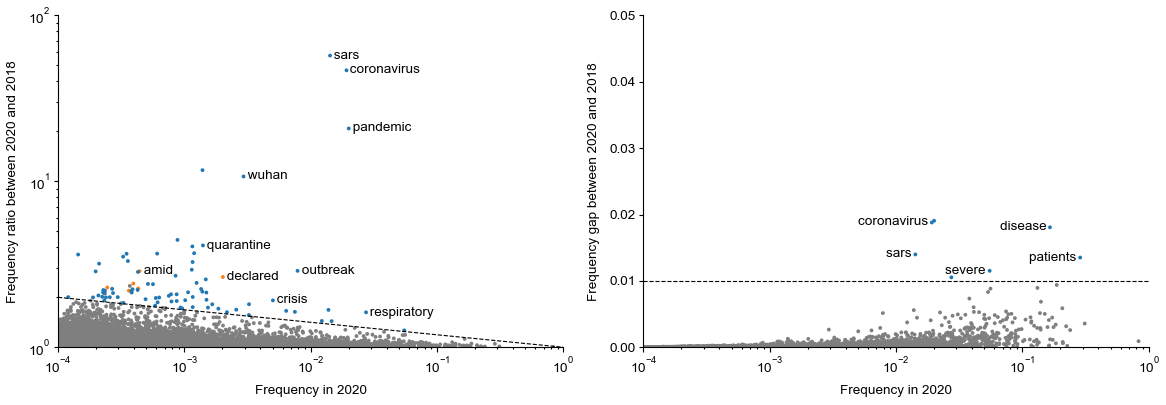

Analyzed words: 26633, increased frequency: 9113


<IPython.core.display.Javascript object>


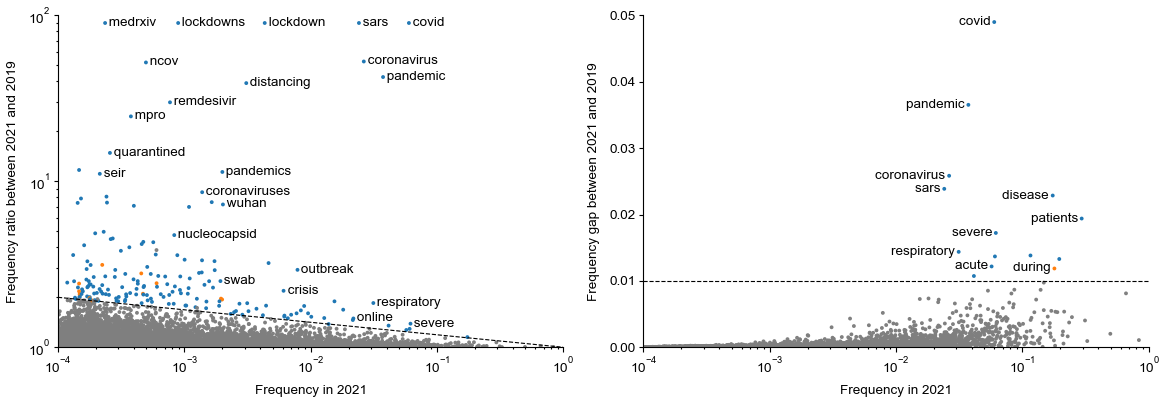

Analyzed words: 26657, increased frequency: 8836


<IPython.core.display.Javascript object>


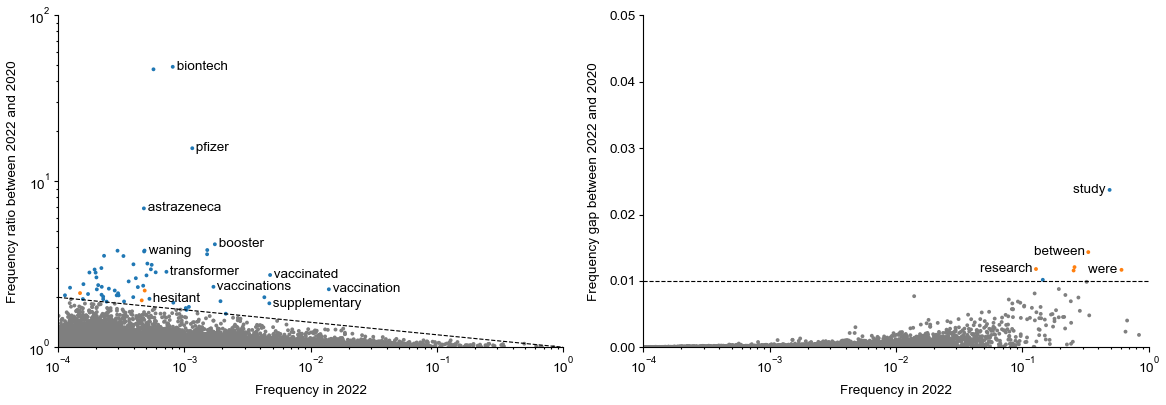

Analyzed words: 26712, increased frequency: 9951


<IPython.core.display.Javascript object>


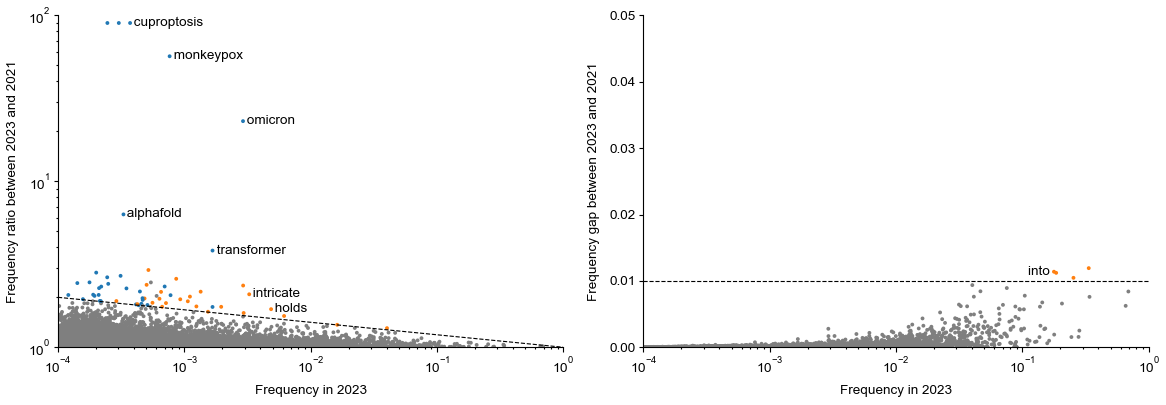

Analyzed words: 26657, increased frequency: 10291


<IPython.core.display.Javascript object>


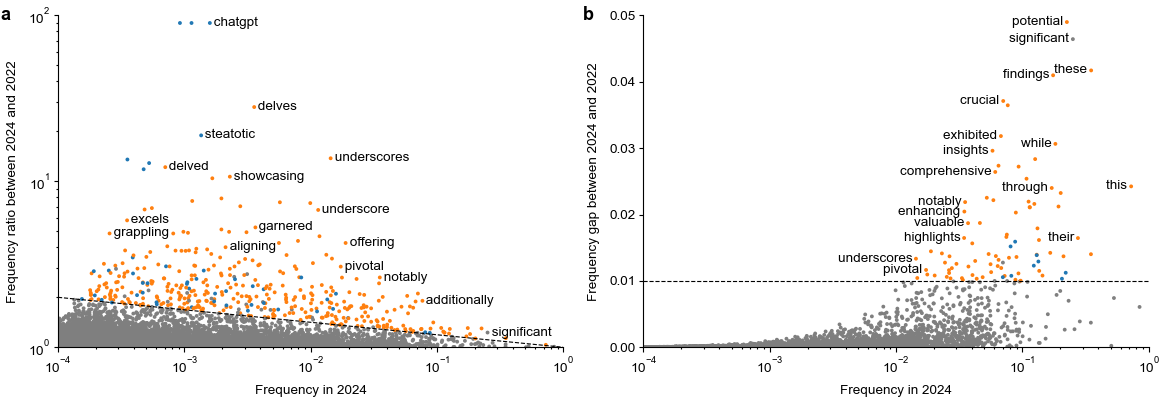

In [7]:
def yearplot(targetYear):
    subsetWords, ratios, diffs, x = compute_excess(targetYear)
    
    print(f'Analyzed words: {ratios.size}, increased frequency: {np.sum(ratios > 1)}')
    
    ratios[ratios > 90] = 90
    diffs[diffs > 0.049] = 0.049
    
    colors = np.array(['tab:gray'] * np.sum(ratios > 1)).astype(dtype='<U12')
    for num, ind in enumerate(np.where(ratios > 1)[0]):
        if np.log10(ratios[ind]) > np.log10(2) - (np.log10(x[ind]) + 4) * (np.log10(2) / 4):
            if word2type[words[subsetWords][ind]] == 'style':
                colors[num] = 'tab:orange'
            if word2type[words[subsetWords][ind]] == 'content':
                colors[num] = 'tab:blue'
    
    fig = plt.figure(figsize=(7.2, 2.5), layout='constrained')
    plt.subplot(121)
    plt.scatter(x[ratios > 1], ratios[ratios > 1], s=2, rasterized=True, c=colors)
    plt.ylim([1, 100])
    plt.xlim([1e-4, 1])
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(f'Frequency in {targetYear}')
    plt.ylabel(f'Frequency ratio between {targetYear} and {targetYear - 2}')
    plt.plot([1e-4, 1], [2, 1], 'k--', linewidth=.5)
    
    txts_a = []
    txts_points_a = []
    show_labels = np.log10(ratios) > np.log10(2.2) - (np.log10(x) + 4) * (np.log10(2) / 4)
    ind_show_labels = np.where(show_labels)[0]

    for i in ind_show_labels:
        txt = plt.text(x[i], ratios[i], ' ' + words[subsetWords][i], fontsize=6, va='center')
        txts_a.append(txt)
        txt = plt.text(x[i], ratios[i], ' ', fontsize=6, va='center')
        txts_points_a.append(txt)
        
    plt.gca().spines[['right', 'top']].set_visible(False)

    colors = np.array(['tab:gray'] * np.sum(diffs > 0)).astype(dtype='<U12')
    for num, ind in enumerate(np.where(diffs > 0)[0]):
        if diffs[ind] > 0.01:
            if word2type[words[subsetWords][ind]] == 'style':
                colors[num] = 'tab:orange'
            if word2type[words[subsetWords][ind]] == 'content':
                colors[num] = 'tab:blue'
    
    plt.subplot(122)
    plt.scatter(x[diffs > 0], diffs[diffs > 0], s=2, rasterized=True, c=colors)
    plt.gca().spines[['right', 'top']].set_visible(False)
    plt.xlim([1e-4, 1])
    plt.xscale('log')
    plt.ylim([0, 0.05])
    plt.plot([1e-4, 1], [0.01, 0.01], 'k--', linewidth=.5)
    plt.xlabel(f'Frequency in {targetYear}')
    plt.ylabel(f'Frequency gap between {targetYear} and {targetYear - 2}')
    
    if targetYear == 2024:
        fig.text(0, .95, 'a', fontsize=8, fontweight='bold')
        fig.text(.5, .95, 'b', fontsize=8, fontweight='bold')
    
    txts_b = []
    txts_points_b = []
    for i in np.where(diffs > 0.011)[0]:
        txt = plt.text(x[i], diffs[i], words[subsetWords][i] + ' ', fontsize=6, ha='right', va='center')
        txts_b.append(txt)
        txt = plt.text(x[i], diffs[i], ' ', fontsize=6, ha='right', va='center')
        txts_points_b.append(txt)
    
    fig.canvas.draw()

    def cleanup_labels(txts, txts_points, ha='left'):
        removed = np.zeros(len(txts), dtype=bool)
        bbox = txts_points[0].get_window_extent()
        space_width = bbox.x1 - bbox.x0
        for i in range(len(txts)):
            bbox = txts[i].get_window_extent()
            if ha == 'left':
                bbox.x0 += space_width
            else:
                bbox.x1 -= space_width
            for j in range(len(txts)):
                if j != i:
                    bbox_point = txts_points[j].get_window_extent()
                    bbox_point.y0 += (bbox_point.y1 - bbox_point.y0) / 3
                    bbox_point.y1 -= (bbox_point.y1 - bbox_point.y0) / 3
                    if bbox.overlaps(bbox_point):
                        removed[i] = True
                        txts[i].remove()
                        break
       
    if len(txts_a) > 0:
        cleanup_labels(txts_a, txts_points_a)
    if len(txts_b) > 0:
        cleanup_labels(txts_b, txts_points_b, ha='right')


for targetYear in range(2013, 2025):
    yearplot(targetYear)
        
    plt.savefig(f'../figures/words{targetYear}.png', dpi=300)
    plt.savefig(f'../figures/words{targetYear}.pdf', dpi=300)

In [8]:
noteworthy_words = {
    2024: ['delves', 'showcasing', 'underscores', 'potential', 'findings', 'crucial', 'masld', 'chatgpt'],
    2015: ['ebola'],
    2017: ['zika'],
    2021: ['coronavirus', 'lockdown', 'pandemic', 'covid']
}

for year in noteworthy_words:
    print('--- ' + str(year) + ' ---')
    
    subsetWords, ratios, diffs, _ = compute_excess(year)
    
    for word in noteworthy_words[year]:
        print(
            f'{word:12} {ratios[words[subsetWords] == word][0]:7.1f}  '
            f' {diffs[words[subsetWords] == word][0]:.3f}  '
            f' {freqs[words == word][0][years == year][0]:.5f}'
        )
    
    print('')

--- 2024 ---
delves          28.0   0.003   0.00357
showcasing      10.7   0.002   0.00229
underscores     13.8   0.013   0.01439
potential        1.3   0.052   0.22526
findings         1.3   0.041   0.17525
crucial          2.1   0.037   0.07060
masld         1556.4   0.001   0.00114
chatgpt        549.6   0.002   0.00159

--- 2015 ---
ebola            9.9   0.001   0.00106

--- 2017 ---
zika            40.4   0.001   0.00150

--- 2021 ---
coronavirus     52.8   0.026   0.02634
lockdown      1495.5   0.004   0.00433
pandemic        42.5   0.037   0.03741
covid         3911.3   0.060   0.05994



## Summary across years

In [9]:
targetYears = np.arange(2013, 2025)

excess_words_per_year = []

for num, targetYear in enumerate(targetYears):
    subsetWords, ratios, diffs, x = compute_excess(targetYear)
        
    ind = np.log10(ratios) > np.log10(2) - (np.log10(x) + 4) * (np.log10(2) / 4)
    ind |= diffs > 0.01
    
    excess_words = list(words[subsetWords][ind])
    
    excess_words_per_year.append(excess_words)
    
    print(f'{targetYear}: found {len(excess_words):3} excess words. ', end='')
    
    cutoff_ratio = 3
    cutoff_freq = 0.0015
    if np.max(ratios[x > cutoff_freq]) < cutoff_ratio:
        print('')
    else:
        top_word = words[subsetWords][x > cutoff_freq][np.argmax(ratios[x > cutoff_freq])]
        print(f' Top word: {top_word}')

2013: found  22 excess words. 
2014: found  46 excess words. 
2015: found  19 excess words. 
2016: found  14 excess words. 
2017: found  25 excess words. 
2018: found  16 excess words. 
2019: found  29 excess words. 
2020: found  90 excess words.  Top word: sars
2021: found 190 excess words.  Top word: covid
2022: found  69 excess words.  Top word: booster
2023: found  64 excess words.  Top word: omicron
2024: found 454 excess words.  Top word: chatgpt


In [10]:
all_excess_words = []
for exc in excess_words_per_year:
    all_excess_words += exc
    
all_excess_words = np.unique(all_excess_words)

print(f'Found {all_excess_words.size} unique excess words overall')

Found 900 unique excess words overall


In [11]:
annotations = pd.read_csv('../results/excess_words.csv')

word2type = dict(zip(annotations.word, annotations.type))
word2partofspeech = dict(zip(annotations.word, annotations.part_of_speech))

print('Words that need to be annotated:')
print(np.setdiff1d(all_excess_words, annotations.word.values))
print('')

print('Words that should be removed from the annotations table:')
print(np.setdiff1d(annotations.word.values, all_excess_words))

print("")
print(f"Content annotations: {np.mean(annotations.type == 'content'):.1%}")
print(f"Style annotations: {np.mean(annotations.type == 'style'):.1%}")

r = np.mean(annotations[annotations.type == 'content'].part_of_speech == 'noun')
print(f"{r:.1%} content words are nouns")

Words that need to be annotated:
[]

Words that should be removed from the annotations table:
[]

Content annotations: 51.3%
Style annotations: 45.2%
79.2% content words are nouns


In [12]:
# NEEDED WHEN EXTENDING THE ANNOTATIONS CSV

# add = np.setdiff1d(all_excess_words, annotations.word.values)
# annotations = pd.concat((annotations, pd.DataFrame({'word': add})))

# remove = np.setdiff1d(annotations.word.values, all_excess_words)
# annotations.drop(annotations.loc[[w in remove for w in annotations.word]].index, inplace=True)

# annotations = annotations.sort_values(by='word').reset_index(drop=True)

# annotations.to_csv('../results/excess_words.csv')

In [13]:
total = np.zeros_like(targetYears)
content = np.zeros_like(targetYears)
style = np.zeros_like(targetYears)
nouns = np.zeros_like(targetYears)
verbs = np.zeros_like(targetYears)
adjectives = np.zeros_like(targetYears)

for i, exc in enumerate(excess_words_per_year):
    total[i] = len(exc)
    content[i] = np.sum([word2type[w] == 'content' for w in exc])
    style[i] = np.sum([word2type[w] == 'style' for w in exc])
    nouns[i] = np.sum([word2partofspeech[w] == 'noun' for w in exc])
    verbs[i] = np.sum([word2partofspeech[w] == 'verb' for w in exc])
    adjectives[i] = np.sum([word2partofspeech[w] == 'adjective' for w in exc])

<IPython.core.display.Javascript object>


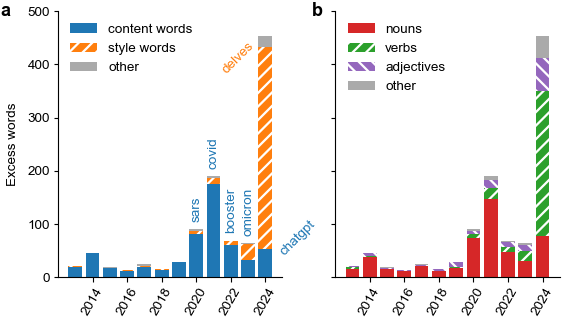

In [14]:
fig = plt.figure(figsize=(3.5, 2), layout='constrained')

plt.subplot(121)
plt.bar(targetYears, content, color='tab:blue', label='content words')
plt.bar(targetYears, style, bottom=content, color='tab:orange', label='style words', 
        hatch="////", edgecolor='w', linewidth=0)
plt.bar(targetYears, total - style - content, bottom=content + style, color='#aaaaaa', label='other')

top_words = {
    2020: 'sars',
    2021: 'covid',
    2022: 'booster',
    2023: 'omicron',
}

for year in top_words:
    plt.text(year, total[targetYears == year] + 20, top_words[year], rotation=90, ha='center', color='tab:blue')
    
plt.text(2024.7, content[-1] + 20, 'chatgpt', va='center', color='tab:blue', rotation=45)
plt.text(2023.5, style[-1] + content[-1] - 20, 'delves', va='center', color='tab:orange', rotation=45, ha='right')

plt.ylim([0, 500])
plt.ylabel('Excess words')
plt.xticks([2014, 2016, 2018, 2020, 2022, 2024], rotation=60)
plt.legend()
plt.gca().spines[['right', 'top']].set_visible(False)
    
plt.subplot(122)

plt.bar(targetYears, nouns, color='tab:red', label='nouns')
plt.bar(targetYears, verbs, color='tab:green', label='verbs', bottom=nouns,
        hatch="////", edgecolor='w', linewidth=0)
plt.bar(targetYears, adjectives, color='tab:purple', label='adjectives', bottom=nouns + verbs,
        hatch="\\\\\\\\", edgecolor='w', linewidth=0)
plt.bar(targetYears, total - nouns - verbs - adjectives, color='#aaaaaa', label='other', 
        bottom = nouns + verbs + adjectives)

plt.ylim([0, 500])
plt.gca().set_yticklabels([])
plt.xticks([2014, 2016, 2018, 2020, 2022, 2024], rotation=60)
plt.legend()
plt.gca().spines[['right', 'top']].set_visible(False)

fig.text(0, .95, 'a', fontsize=8, fontweight='bold')
fig.text(.55, .95, 'b', fontsize=8, fontweight='bold')

plt.savefig('../figures/excess-per-year.png', dpi=300)
plt.savefig('../figures/excess-per-year.pdf')

In [15]:
exc = [w for w in excess_words_per_year[-1] if word2type[w] == 'style']

print(f"{len(exc)} excess style words in 2024")
print(f"{100 * np.mean([word2partofspeech[w] == 'verb' for w in exc]):.0f}% verbs")
print(f"{100 * np.mean([word2partofspeech[w] == 'adjective' for w in exc]):.0f}% adjectives")

379 excess style words in 2024
66% verbs
14% adjectives


### With lemmatization

In [16]:
# This needs to be run only once
#
# import nltk
# nltk.download('omw-1.4')
# nltk.download('wordnet')
    
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

# A copy is provided in the data/ folder, just in case
import requests
url = "https://raw.githubusercontent.com/hyperreality/" \
      "American-British-English-Translator/master/data/british_spellings.json"
uk2us = requests.get(url).json()    

def americanize(word):
    for uk_spelling, us_spelling in uk2us.items():
        word = word.replace(uk_spelling, us_spelling)
    return word

def lemmatize(word):
    lemmatize_manual = {
        'chatbots': 'chatbot',
        'circrnas': 'circrna',
        'coronaviruses': 'coronavirus',
        'showcased': 'showcase',
        'showcases': 'showcase',
        'showcasing': 'showcase',
    }
    if word in lemmatize_manual:
        return lemmatize_manual[word]
    elif wnl.lemmatize(word, pos='v') != word:
        return wnl.lemmatize(word, pos='v')
    else:
        return wnl.lemmatize(word, pos='n')

word2lemma = dict([(w, lemmatize(americanize(w))) for w in all_excess_words])
lemma2word = {v: k for k, v in word2lemma.items()}

unique_count = np.unique(list(word2lemma.values())).size
print(f"Unique excess words after lemmatizing: {unique_count}")

Unique excess words after lemmatizing: 770


In [17]:
# Clashes for part of speach after lemmatizing

for v in np.unique(list(word2lemma.values())):
    keys = [k for k in word2lemma.keys() if word2lemma[k]==v]
    if np.unique([word2type[k] for k in keys]).size > 1:
        print(keys, v)
        
# There are only two clashes, so we are going to ignore it

['prompting', 'prompts'] prompt
['surge', 'surged'] surge


In [18]:
total = np.zeros_like(targetYears)
content = np.zeros_like(targetYears)
style = np.zeros_like(targetYears)
nouns = np.zeros_like(targetYears)
verbs = np.zeros_like(targetYears)
adjectives = np.zeros_like(targetYears)

for i, exc in enumerate(excess_words_per_year):
    lemmas = list(np.unique([word2lemma[w] for w in exc]))
    
    total[i] = len(lemmas)
    content[i] = np.sum([word2type[lemma2word[w]] == 'content' for w in lemmas])
    style[i] = np.sum([word2type[lemma2word[w]] == 'style' for w in lemmas])
    nouns[i] = np.sum([word2partofspeech[lemma2word[w]] == 'noun' for w in lemmas])
    verbs[i] = np.sum([word2partofspeech[lemma2word[w]] == 'verb' for w in lemmas])
    adjectives[i] = np.sum([word2partofspeech[lemma2word[w]] == 'adjective' for w in lemmas])
    
print('Excess words per year after lemmatization:')
for i in range(total.size):
    print(f"  {years[i]}: {total[i]:3}")

Excess words per year after lemmatization:
  2010:  22
  2011:  46
  2012:  19
  2013:  14
  2014:  25
  2015:  15
  2016:  29
  2017:  87
  2018: 180
  2019:  67
  2020:  60
  2021: 343


<IPython.core.display.Javascript object>


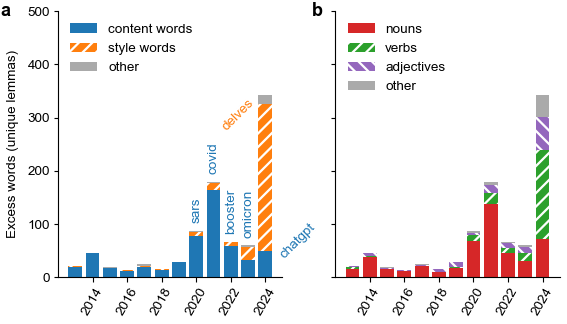

In [19]:
fig = plt.figure(figsize=(3.5, 2), layout='constrained')

plt.subplot(121)
plt.bar(targetYears, content, color='tab:blue', label='content words')
plt.bar(targetYears, style, bottom=content, color='tab:orange', label='style words', 
        hatch="////", edgecolor='w', linewidth=0)
plt.bar(targetYears, total - style - content, bottom=content + style, color='#aaaaaa', label='other')

top_words = {
    2020: 'sars',
    2021: 'covid',
    2022: 'booster',
    2023: 'omicron',
}

for year in top_words:
    plt.text(year, total[targetYears == year] + 20, top_words[year], rotation=90, ha='center', color='tab:blue')
    
plt.text(2024.7, content[-1] + 20, 'chatgpt', va='center', color='tab:blue', rotation=45)
plt.text(2023.5, style[-1] + content[-1] - 20, 'delves', va='center', color='tab:orange', rotation=45, ha='right')

plt.ylim([0, 500])
plt.ylabel('Excess words (unique lemmas)')
plt.xticks([2014, 2016, 2018, 2020, 2022, 2024], rotation=60)
plt.legend(loc="upper left")
plt.gca().spines[['right', 'top']].set_visible(False)
    
plt.subplot(122)

plt.bar(targetYears, nouns, color='tab:red', label='nouns')
plt.bar(targetYears, verbs, color='tab:green', label='verbs', bottom=nouns,
        hatch="////", edgecolor='w', linewidth=0)
plt.bar(targetYears, adjectives, color='tab:purple', label='adjectives', bottom=nouns + verbs,
        hatch="\\\\\\\\", edgecolor='w', linewidth=0)
plt.bar(targetYears, total - nouns - verbs - adjectives, color='#aaaaaa', label='other', 
        bottom = nouns + verbs + adjectives)

plt.ylim([0, 500])
plt.gca().set_yticklabels([])
plt.xticks([2014, 2016, 2018, 2020, 2022, 2024], rotation=60)
plt.legend()
plt.gca().spines[['right', 'top']].set_visible(False)

fig.text(0, .95, 'a', fontsize=8, fontweight='bold')
fig.text(.55, .95, 'b', fontsize=8, fontweight='bold')

plt.savefig('../figures/excess-per-year-lemmatized.png', dpi=300)
plt.savefig('../figures/excess-per-year-lemmatized.pdf')

## Excess gap based on rare style excess words

In [20]:
subsetWords, ratios, diffs, x = compute_excess(2024)

ind = np.log10(ratios) > np.log10(2) - (np.log10(x) + 4) * (np.log10(2) / 4)
ind |= diffs > 0.01

chatgpt_words =   np.array(
    [w         for i, w in enumerate(words[subsetWords][ind]) if word2type[w] == 'style']
)
chatgpt_words_f = np.array(
    [x[ind][i] for i, w in enumerate(words[subsetWords][ind]) if word2type[w] == 'style']
)

cutoffs = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]

for cutoff in cutoffs:
    print(f'Cutoff: {cutoff:6}, number of style words: {np.sum(chatgpt_words_f < cutoff)}')

Cutoff: 0.0002, number of style words: 7
Cutoff: 0.0005, number of style words: 57
Cutoff:  0.001, number of style words: 100
Cutoff:  0.002, number of style words: 157
Cutoff:  0.005, number of style words: 206
Cutoff:   0.01, number of style words: 244
Cutoff:   0.02, number of style words: 291
Cutoff:   0.05, number of style words: 331
Cutoff:    0.1, number of style words: 356
Cutoff:    0.2, number of style words: 372
Cutoff:    0.5, number of style words: 378


In [21]:
print(', '.join(list(chatgpt_words[chatgpt_words_f < 0.02])))

accentuates, acknowledges, acknowledging, addresses, adept, adhered, adhering, advancement, advancements, advancing, advocates, advocating, affirming, afflicted, aiding, akin, align, aligning, aligns, alongside, amidst, assessments, attains, attributed, augmenting, avenue, avenues, bolster, bolstered, bolstering, broader, burgeoning, capabilities, capitalizing, categorized, categorizes, categorizing, combating, commendable, compelling, complicates, complicating, comprehending, comprising, consequently, consolidates, contributing, conversely, correlating, crafted, crafting, culminating, customizing, delineates, delve, delved, delves, delving, demonstrating, dependability, dependable, detailing, detrimentally, diminishes, diminishing, discern, discerned, discernible, discerning, displaying, disrupts, distinctions, distinctive, elevate, elevates, elevating, elucidate, elucidates, elucidating, embracing, emerges, emphasises, emphasising, emphasize, emphasizes, emphasizing, employing, emplo

<IPython.core.display.Javascript object>


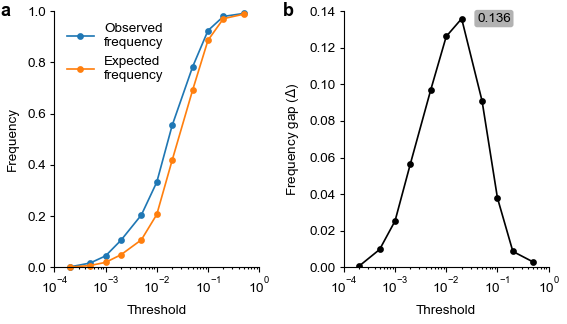

[0.00070295 0.00972764 0.02531085 0.05670942 0.09715452 0.12622043
 0.13594737 0.09106275 0.03789653 0.00866322 0.002871  ]


In [22]:
cutoff_counts = np.load('../results/yearly-counts-cutoff.npy')

cutoffs = [0.0002, 0.0005, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5]

cutoff_freqs = (cutoff_counts + 1) / (totals + 1)

deltas = np.zeros(len(cutoffs))
ps = np.zeros(len(cutoffs))
qs = np.zeros(len(cutoffs))

for i, f in enumerate(cutoff_freqs):
    projection = f[-3] + np.maximum(0, f[-3] - f[-4]) * 2
    deltas[i] = f[-1] - projection
    ps[i] = f[-1]
    qs[i] = projection
    
fig = plt.figure(figsize=(3.5, 2), layout='constrained')
plt.subplot(121)
plt.plot(cutoffs, ps, '.-', clip_on=False, label='Observed\nfrequency')
plt.plot(cutoffs, qs, '.-', clip_on=False, label='Expected\nfrequency')
plt.legend()
plt.xscale('log')
plt.xlim([1e-4, 1])
plt.ylim([0, 1])
plt.ylabel('Frequency')
plt.xlabel('Threshold')

plt.subplot(122)
plt.plot(cutoffs, deltas, 'k.-', label='Frequency gap (Delta)')
plt.xscale('log')
plt.xlim([1e-4, 1])
plt.ylim([0, .14])
plt.ylabel(r'Frequency gap ($\Delta$)')
plt.xlabel('Threshold')
plt.text(0.04, 0.136, "0.136", va="center", 
         bbox=dict(edgecolor='none', facecolor='#666666', alpha=.5, boxstyle='round,pad=.2'))

fig.text(0, .95, 'a', fontsize=8, fontweight='bold')
fig.text(.5, .95, 'b', fontsize=8, fontweight='bold')

plt.savefig('../figures/delta-curve.png', dpi=200)
plt.savefig('../figures/delta-curve.pdf')

print(deltas)

## Subgroup analysis

In [23]:
df_subsets = pd.read_csv('../results/yearly-counts-subgroups.csv')

for i in range(len(df_subsets)):
    f = (df_subsets.values[i, 2:2+15] + 1) / (df_subsets.values[i, 2+30:2+45] + 1)
    projection = f[-3] + np.maximum(0, f[-3] - f[-4]) * 2
    delta_common = f[-1] - projection
    
    f = (df_subsets.values[i, 2+15:2+30] + 1) / (df_subsets.values[i, 2+30:2+45] + 1)
    projection = f[-3] + np.maximum(0, f[-3] - f[-4]) * 2
    delta_rare = f[-1] - projection
    
    if np.all(df_subsets.values[i, 2+30:2+45][-7:-1] >= 300):
        df_subsets.loc[i, 'delta_common'] = delta_common
        df_subsets.loc[i, 'delta_rare'] = delta_rare
        df_subsets.loc[i, 'delta'] = (delta_rare + delta_common) / 2
    else:
        df_subsets.loc[i, 'delta_common'] = np.nan
        df_subsets.loc[i, 'delta_rare'] = np.nan
        df_subsets.loc[i, 'delta'] = np.nan
        
df_subsets

,grouptype,group,2010_common,2011_common,2012_common,2013_common,2014_common,2015_common,2016_common,2017_common,...,2018_total,2019_total,2020_total,2021_total,2022_total,2023_total,2024_total,delta_common,delta_rare,delta
0,all,all,150261,164545,184055,200864,218600,232120,246485,259553,...,981467,1036674,1178128,1335358,1365489,1301213,1442378,0.133807,0.135947,0.134877
1,class,environment,2456,2639,3038,3438,4124,4358,5494,5844,...,23395,28834,35653,43405,50839,43336,40847,0.221508,0.180728,0.201118
2,class,dentistry,379,369,516,524,571,631,628,633,...,3683,3444,3604,3871,3875,4072,5260,0.099756,0.138937,0.119347
3,class,pediatric,1454,1554,1603,1914,1918,2007,2196,2289,...,10500,10678,12394,14401,14218,12520,14123,0.110461,0.107897,0.109179
4,class,infectious,830,893,1043,1114,1297,1308,1492,1552,...,6104,7005,8478,9923,8200,7086,8638,0.098942,0.098977,0.098960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,country/journals,South Korea & Basel,19,19,25,34,49,70,112,150,...,864,1342,2325,3397,3217,3054,2350,0.280556,0.261418,0.270987
232,country/journals,Taiwan & Frontiers,0,3,5,15,21,22,41,63,...,234,276,412,871,1110,500,281,NaN,NaN,NaN
233,country/journals,Taiwan & Basel,14,27,25,28,36,44,59,66,...,299,432,759,1349,1462,1101,802,NaN,NaN,NaN
234,country/journals,Iran & Frontiers,0,0,0,1,3,6,8,8,...,86,157,227,498,907,644,548,NaN,NaN,NaN


<IPython.core.display.Javascript object>


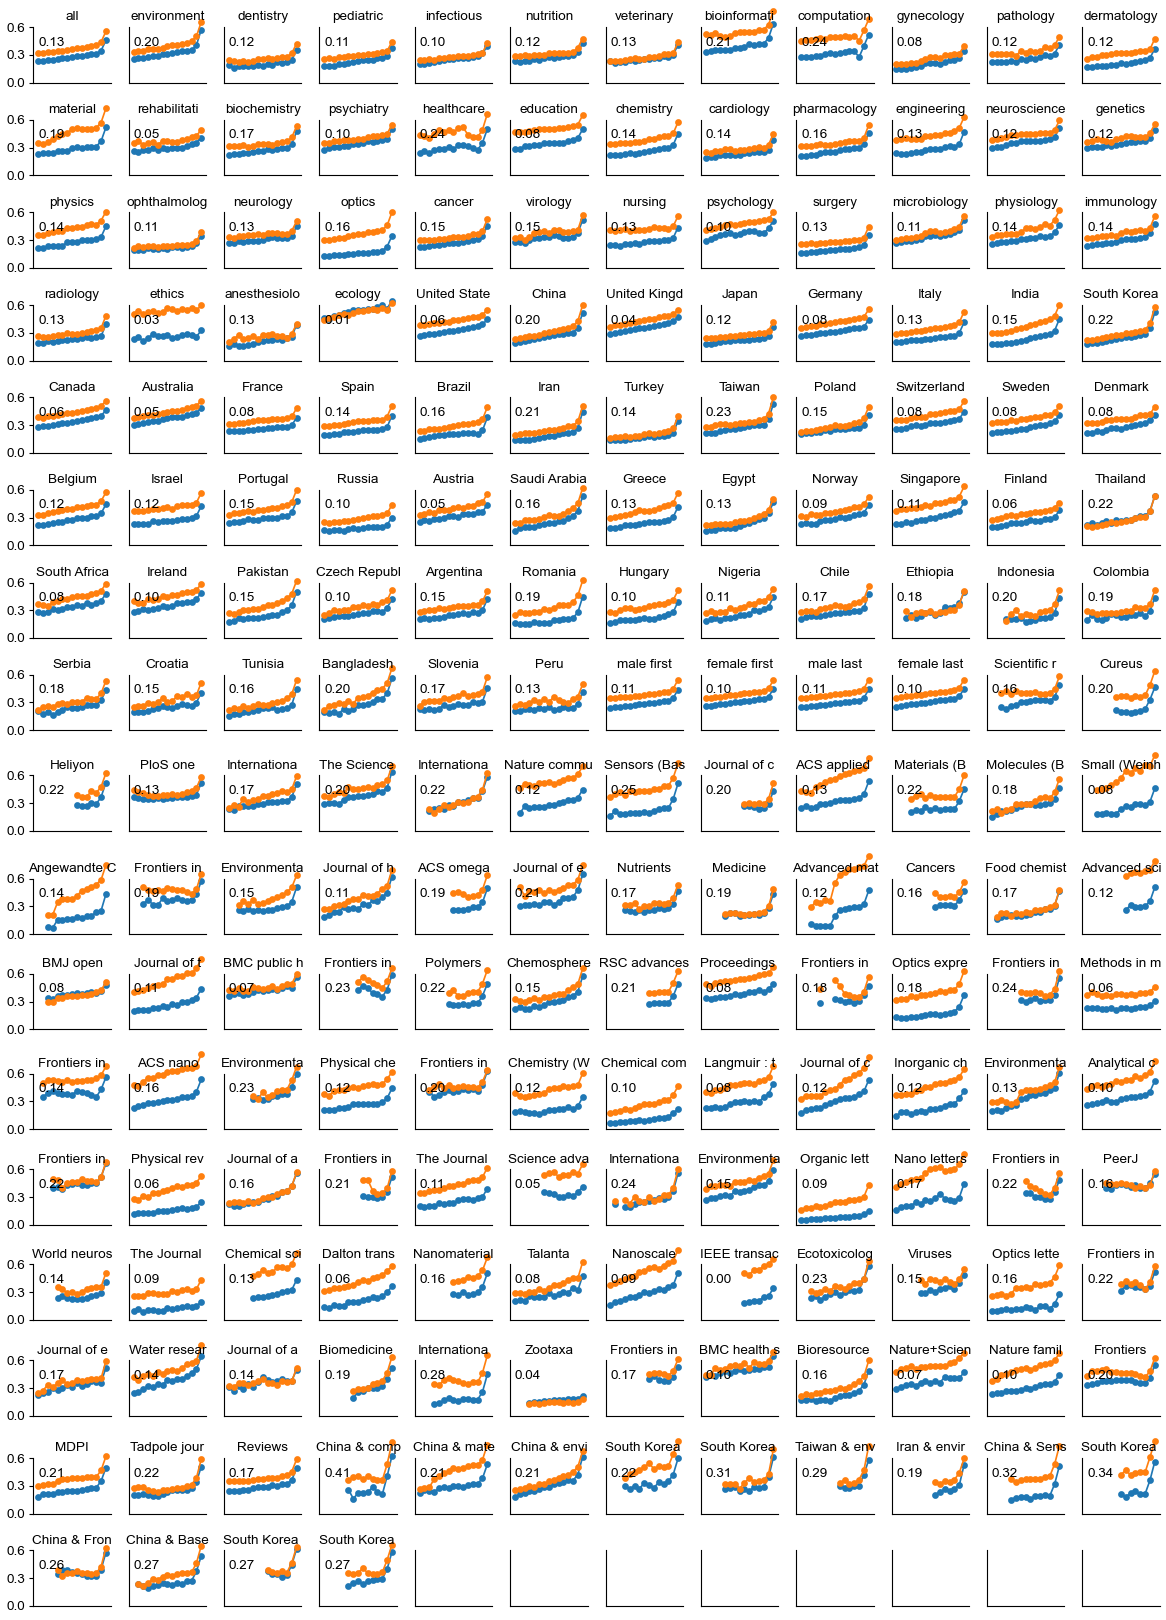

In [24]:
fig, axs = plt.subplots(nrows=17, ncols=12, figsize=(7.2, 10), layout='constrained')
num = 0

for i in range(len(df_subsets)):
    group = df_subsets.group.values[i]
    common = df_subsets.values[i, 2:2+15].ravel().astype(float)
    rare = df_subsets.values[i, 2+15:2+30].ravel().astype(float)
    total = df_subsets.values[i, 2+30:2+45].ravel().astype(float)
    
    total[:-1][total[:-1] < 300] = np.nan
    
    if np.all(~np.isnan(total[-7:-1])):
        axs.flat[num].plot(years, (common + 1) / (total + 1), '.-', clip_on=False)
        axs.flat[num].plot(years, (rare + 1) / (total + 1), '.-', clip_on=False)
        axs.flat[num].set_title(group[:12], fontsize=6)
        
        axs.flat[num].text(2010, .4, f'{df_subsets.delta.values[i]:.2f}')
        
        num += 1
        
    if num == axs.size:
        break
    
for i in range(axs.size):
    axs.flat[i].set_xticks([])
    if i % axs.shape[1]:
        axs.flat[i].set_yticks([])
    else:
        axs.flat[i].set_yticks([0, .3, .6])
    axs.flat[i].spines[['right', 'top']].set_visible(False)
    axs.flat[i].set_ylim([0, .6])
    axs.flat[i].set_xlim([2009, 2025])

<IPython.core.display.Javascript object>


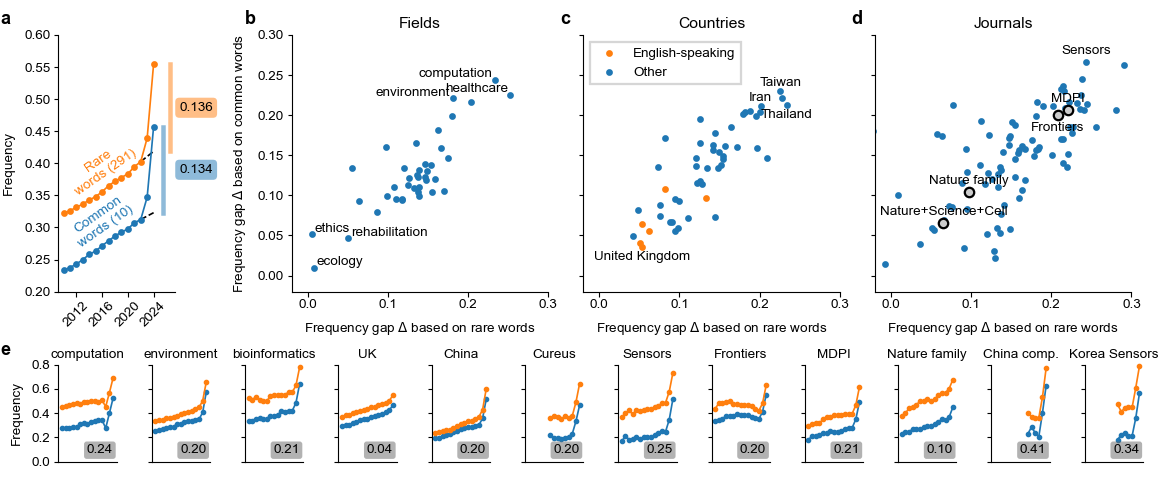

common: gap = 0.134
rare: gap = 0.136


In [25]:
fig = plt.figure(figsize=(7.2, 3), constrained_layout=False)

ax = plt.axes([.05, .4, .1, .22 * 7.2 / 3])

common = df_subsets.values[0, 2:2+15].ravel().astype(float) + 1
rare = df_subsets.values[0, 2+15:2+30].ravel().astype(float) + 1
total = df_subsets.values[0, 2+30:2+45].ravel().astype(float) + 1
rare /= total
common /= total

line_common = ax.plot(years, common, '.-')
line_rare = ax.plot(years, rare, '.-')

y = common[-3] + (common[-3] - common[-4]) * np.arange(3)
ax.plot(years[-3:], y, 'k--', zorder=0)

ax.text(2028, (common[-1] + y[-1]) / 2, f'{common[-1] - y[-1]:.3f}', va='center',
        bbox=dict(edgecolor='none', facecolor=line_common[0].get_color(), alpha=.5, boxstyle='round'))
ax.plot([2025.5, 2025.5], [y[-1], common[-1]], lw=2, c=line_common[0].get_color(), alpha=.5)

print(f'common: gap = {common[-1] - y[-1]:.3f}')

y = rare[-3] + (rare[-3] - rare[-4]) * np.arange(3)
ax.plot(years[-3:], y, 'k--', zorder=0)

ax.text(2028, (rare[-1] + y[-1]) / 2, f'{rare[-1] - y[-1]:.3f}', va='center',
        bbox=dict(edgecolor='none', facecolor=line_rare[0].get_color(), alpha=.5, boxstyle='round'))
ax.plot([2026.5, 2026.5], [y[-1], rare[-1]], lw=2, c=line_rare[0].get_color(), alpha=.5)

print(f'rare: gap = {rare[-1] - y[-1]:.3f}')

ax.set_ylabel('Frequency')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks([2012, 2016, 2020, 2024])
ax.set_xticklabels([2012, 2016, 2020, 2024], rotation=45)
ax.text(2016, 0.27, 'Common\nwords (10)', rotation=35, ha='center', color="tab:blue")
ax.text(2016, 0.35, 'Rare\nwords (291)', rotation=35, ha='center', color="tab:orange")
ax.set_ylim([0.2, 0.6])

ax = plt.axes([.25, .4, .22, .22 * 7.2 / 3])

plt.scatter(
    df_subsets[df_subsets.grouptype=='class']['delta_rare'],
    df_subsets[df_subsets.grouptype=='class']['delta_common']
)
# for g in df_subsets[df_subsets.grouptype=='class'].group:
#     plt.text(df_subsets[df_subsets.group==g]['delta_rare'], 
#              df_subsets[df_subsets.group==g]['delta_common'] + 0.005, 
#              g, fontsize=6, ha='center')
for g in ['computation', 'environment', 'healthcare']:
    plt.text(df_subsets[df_subsets.group==g]['delta_rare'] - 0.003, 
             df_subsets[df_subsets.group==g]['delta_common'] + 0.003, 
             g, fontsize=6, ha='right')
for g in ['rehabilitation', 'ethics', 'ecology']:
    plt.text(df_subsets[df_subsets.group==g]['delta_rare'] + 0.003, 
             df_subsets[df_subsets.group==g]['delta_common'] + 0.003, 
             g, fontsize=6)
plt.xlim([-0.02, .3])
plt.ylim([-0.02, .3])
plt.title('Fields')
plt.xlabel(r'Frequency gap $\Delta$ based on rare words')
plt.ylabel(r'Frequency gap $\Delta$ based on common words')

ax = plt.axes([.50, .4, .22, .22 * 7.2 / 3])

english = [
    'United States', 'United Kingdom', 'Canada', 'Australia', 'Ireland',
    'New Zealand', 'Nigeria'
]
other = [
    'Germany', 'Italy', 'France', 'Spain', 'Brazil', 'Netherlands',
    'Poland', 'Switzerland', 'Sweden', 'Denmark', 'Belgium',
    'Portugal', 'Russia', 'Austria', 'Greece', 'Norway',
    'South Africa', 'Mexico', 'Czech Republic', 'Argentina',
    'Romania', 'Chile', 'Colombia', 'Serbia', 'Croatia',
    'China', 'Japan', 'India', 'South Korea', 'Iran', 'Turkey', 'Taiwan', 
    'Israel', 'Saudi Arabia',  'Egypt', 'Singapore', 'Finland',
    'Thailand', 'Malaysia', 'Pakistan', 'Hungary', 'Ethiopia',
    'Indonesia', 'Tunisia', 'Bangladesh', 'Slovenia', 'Peru',
]

assert(np.all(np.isin(df_subsets[df_subsets.grouptype=='country'].group.values, english + other)))

plt.scatter(
    df_subsets[df_subsets.group.isin(english)].delta_rare,
    df_subsets[df_subsets.group.isin(english)].delta_common,
    c = 'tab:orange', label='English-speaking'
)
plt.scatter(
    df_subsets[df_subsets.group.isin(other)].delta_rare,
    df_subsets[df_subsets.group.isin(other)].delta_common,
    c = 'tab:blue', label='Other'
)
# for gr in df_subsets[df_subsets.grouptype=='country'].group:
#     plt.text(
#         df_subsets[df_subsets.group==gr].delta_rare,
#         df_subsets[df_subsets.group==gr].delta_common,
#         gr,
#         ha='center'
#     )
for gr in ['Taiwan', 'Thailand', 'Iran', 'United Kingdom']:
    d = 0.007
    if gr in ['Thailand', 'United Kingdom']:
        d = -0.017
    plt.text(
        df_subsets[df_subsets.group==gr].delta_rare,
        df_subsets[df_subsets.group==gr].delta_common + d,
        gr,
        ha='center'
    )
plt.legend(loc='upper left', frameon=True)
plt.xlim([-0.02, .3])
plt.ylim([-0.02, .3])
ax.set_yticklabels([])
plt.title('Countries')
plt.xlabel(r'Frequency gap $\Delta$ based on rare words')

ax = plt.axes([.75, .4, .22, .22 * 7.2 / 3])

plt.scatter(
    df_subsets[df_subsets.grouptype=='journal']['delta_rare'],
    df_subsets[df_subsets.grouptype=='journal']['delta_common'],
)
ind = (df_subsets.grouptype == 'journals') & (df_subsets.group != 'Tadpole journals')
plt.scatter(
    df_subsets[ind]['delta_rare'],
    df_subsets[ind]['delta_common'],
    c = '#cccccc',
    edgecolor = 'k',
    s = 70,
)
# for gr in df_subsets[df_subsets.grouptype=='journal'].group:
#     plt.text(
#         df_subsets[df_subsets.group==gr].delta_rare,
#         df_subsets[df_subsets.group==gr].delta_common,
#         gr,
#         ha='center'
#     )
for gr in ['Sensors (Basel, Switzerland)', 'Nature+Science+Cell', 
           'Nature family', 'Frontiers', 'MDPI']:
    d = 0.01
    if gr in ['Frontiers']:
        d = -0.02
    plt.text(
        df_subsets[df_subsets.group==gr].delta_rare,
        df_subsets[df_subsets.group==gr].delta_common + d,
        gr if len(gr) < 20 else gr.split()[0],
        ha='center'
    )
plt.xlim([-0.02, .30])
plt.ylim([-0.02, .30])
ax.set_yticklabels([])
plt.title('Journals')
plt.xlabel(r'Frequency gap $\Delta$ based on rare words')

subgroups = ['computation', 'environment', 'bioinformatics', 
             'United Kingdom', 'China',  
             'Cureus', 'Sensors (Basel, Switzerland)',
             'Frontiers', 'MDPI', 'Nature family', 'China & computation',
             'South Korea & Sensors (Basel, Switzerland)'
            ]

shorten = {
    'United Kingdom': 'UK',
    'South Korea': 'S. Korea',
    'Sensors (Basel, Switzerland)': 'Sensors',
    'Frontiers': 'Frontiers',
    'China & computation': 'China comp.',
    'South Korea & Sensors (Basel, Switzerland)': 'Korea Sensors'
}

for i in range(12):
    ax = plt.axes([.05 + .08 * i, .05, .05, .2])

    if i < len(subgroups):
        ind = df_subsets.group == subgroups[i]
        delta = df_subsets[ind].delta.values[0]
        common = df_subsets[ind].values[:, 2:2+15].ravel().astype(float) + 1
        rare = df_subsets[ind].values[:, 2+15:2+30].ravel().astype(float) + 1
        total = df_subsets[ind].values[:, 2+30:2+45].ravel().astype(float) + 1
        rare /= total
        common /= total
        rare[:-1][total[:-1] < 400] = np.nan
        common[:-1][total[:-1] < 400] = np.nan
        
        ax.set_title(
            shorten[subgroups[i]] if subgroups[i] in shorten else subgroups[i], 
            fontsize=6
        )
        
        ax.text(2024, 0.07, f'{delta:.2f}', ha='right',
                bbox=dict(edgecolor='none', facecolor='#666666', alpha=.5, boxstyle='round,pad=.2'))

    ax.plot(years, common, '.-', markersize=3, clip_on=False)
    ax.plot(years, rare, '.-', markersize=3, clip_on=False)
    ax.set_xlim([2009, 2025])
    if i > 0:
        ax.set_yticks([0, .2, .4, .6, .8])
        ax.set_yticklabels([])
    else:
        ax.set_yticks([0, .2, .4, .6, .8])
        ax.set_ylabel('Frequency')
    ax.set_ylim([0, .8])
    ax.set_xticks([])

fig.text(0, .95, 'a', fontsize=8, fontweight='bold')
fig.text(.21, .95, 'b', fontsize=8, fontweight='bold')
fig.text(.48, .95, 'c', fontsize=8, fontweight='bold')
fig.text(.73, .95, 'd', fontsize=8, fontweight='bold')
fig.text(0, .27, 'e', fontsize=8, fontweight='bold')

fig.savefig('../figures/subgroups.png', dpi=300)
fig.savefig('../figures/subgroups.pdf')